In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).mean()

In [3]:
class Knn_classifier:
    
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    
    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'): 
     
        if(metric == 'l2'):   
            distances = np.sqrt(np.sum((self.train_images - test_image) ** 2, axis = 1))
        elif(metric == 'l1'):
            distances = np.sum(abs(self.train_images - test_image), axis = 1)
        else:
            print('Error! Metric {} is not defined!'.format(metric))
            
        sort_index = np.argsort(distances)
        sort_index = sort_index[:num_neighbors]
        nearest_labels = self.train_labels[sort_index]
        histc = np.bincount(nearest_labels)
        
        return np.argmax(histc)
    
              
    def classify_images(self, test_images, num_neighbors = 3, metric = 'l2'):
        num_test_images = test_images.shape[0] 
        predicted_labels = np.zeros((num_test_images))
        
        for i in range(num_test_images): 
            predicted_labels[i] = self.classify_image(test_images[i, :], num_neighbors = num_neighbors, metric = metric)
        
        return predicted_labels

In [4]:
train_images = np.loadtxt('Data/data/train_images.txt')
train_labels = np.loadtxt('Data/data/train_labels.txt')
train_labels = train_labels.astype(int)

test_images = np.loadtxt('Data/data/test_images.txt')
test_labels = np.loadtxt('Data/data/test_labels.txt') 
test_labels = test_labels.astype(int)

In [12]:
classifier = Knn_classifier(train_images, train_labels)

In [13]:
predicted_labels = classifier.classify_images(test_images, 3, 'l2')

In [14]:
accuracy = accuracy_score(test_labels, predicted_labels)

In [15]:
print(accuracy)

0.898


In [16]:
k_list = [1,3,5,7,9,11]
l2_acc = []
for k in k_list:
    classifier = Knn_classifier(train_images, train_labels)
    predicted_labels = classifier.classify_images(test_images, k, 'l2')
    accuracy = accuracy_score(test_labels, predicted_labels)
    l2_acc.append(accuracy)
    print("k: {}, accuracy: {}".format(k, accuracy))
    
l2_acc = np.array(l2_acc)
np.savetxt('l2_acc.txt', l2_acc)

k: 1, accuracy: 0.884
k: 3, accuracy: 0.898
k: 5, accuracy: 0.896
k: 7, accuracy: 0.88
k: 9, accuracy: 0.88
k: 11, accuracy: 0.872


In [17]:
k_list = [1,3,5,7,9,11]
l1_acc = []
for k in k_list:
    classifier = Knn_classifier(train_images, train_labels)
    predicted_labels = classifier.classify_images(test_images, k, 'l1')
    accuracy = accuracy_score(test_labels, predicted_labels)
    print("k: {}, accuracy: {}".format(k, accuracy))
    l1_acc.append(accuracy)

l1_acc = np.array(l1_acc)
np.savetxt('l1_acc.txt', l1_acc)

k: 1, accuracy: 0.88
k: 3, accuracy: 0.884
k: 5, accuracy: 0.868
k: 7, accuracy: 0.864
k: 9, accuracy: 0.864
k: 11, accuracy: 0.856


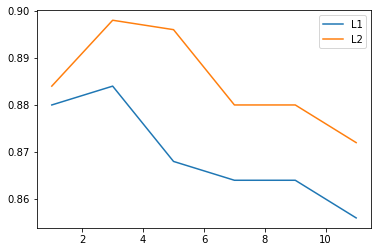

In [20]:
l1 = np.loadtxt('l1_acc.txt')
l2 = np.loadtxt('l2_acc.txt')

plt.plot(k_list, l1)
plt.plot(k_list, l2)
plt.legend(['L1', 'L2'])
plt.show()